In [1]:
import pandas as pnd

In [2]:
import os

In [3]:
years_begin = 1900
years_end = 2000
years_step = 5
years_chck = [1950]
path_name = 'names'
children_names = ['Ruth', 'Robert']
ntop = 10

In [4]:
DATA_PATH = os.path.join(os.getcwd(),path_name)

In [5]:
DATA_PATH

'C:\\Users\\irina\\source\\repos\\ex4-2\\names'

In [6]:
data_pathes = []
data_years = []
for year in range(years_begin, years_end):
    str_year = "yob" + str(year)+ ".txt"
    path_test = os.path.join(DATA_PATH, str_year)
    if os.path.exists(path_test) and os.path.isfile(path_test):
        data_pathes.append(path_test)
        data_years.append(year)
str_ch_names = '","'.join(children_names)

In [7]:
str_ch_names = 'Name == ["'+str_ch_names+'"]'

In [8]:
data_for_analytics = []
for dp in data_pathes:
    data_for_analytics.append(pnd.read_csv(dp, names = ['Name', 'Gender', 'Count']))

In [9]:
for data_elem_analytics, year_elem in zip(data_for_analytics, data_years):
    len_df = len(data_elem_analytics)
    year_series = pnd.Series((year_elem) for i in range(len_df))
    data_elem_analytics['Year'] = year_series

In [10]:
if len(data_for_analytics):
    data_by_all_years_with_years = pnd.concat(data_for_analytics)
    data_by_children_by_all_year = data_by_all_years_with_years.query(str_ch_names)

In [11]:
grouped_data = data_by_children_by_all_year.groupby(['Year', 'Name']).sum()

In [12]:
plot_data = grouped_data.unstack('Name')

In [13]:
plot_data.plot()

In [14]:
data_pathes = []
data_years = []
for year in range(years_begin, years_end, years_step):
    str_year = "yob" + str(year)+ ".txt"
    path_test = os.path.join(DATA_PATH, str_year)
    if os.path.exists(path_test) and os.path.isfile(path_test):
        data_pathes.append(path_test)
        data_years.append(year)

data_for_analytics = []
for dp in data_pathes:
    data_for_analytics.append(pnd.read_csv(dp, names = ['Name', 'Gender', 'Count']))

for data_elem_analytics, year_elem in zip(data_for_analytics, data_years):
    len_df = len(data_elem_analytics)
    year_series = pnd.Series((year_elem) for i in range(len_df))
    data_elem_analytics['Year'] = year_series

if len(data_for_analytics):
    data_by_all_years_with_years = pnd.concat(data_for_analytics)
    data_by_children_by_all_year = data_by_all_years_with_years.query(str_ch_names)

grouped_data = data_by_children_by_all_year.groupby(['Year', 'Name']).sum()

plot_data = grouped_data.unstack('Name')

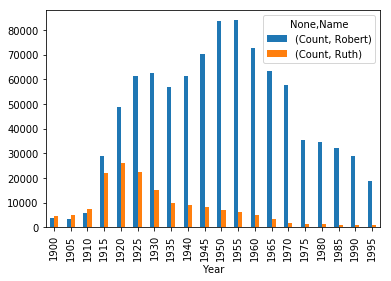

In [15]:
plot_data.plot.bar()

In [16]:
data_pathes = []
data_years = []
for year in years_chck:
    str_year = "yob" + str(year)+ ".txt"
    path_test = os.path.join(DATA_PATH, str_year)
    if os.path.exists(path_test) and os.path.isfile(path_test):
        data_pathes.append(path_test)
        data_years.append(year)

data_for_analytics = []
for dp in data_pathes:
    data_for_analytics.append(pnd.read_csv(dp, names = ['Name', 'Gender', 'Count']))

for data_elem_analytics, year_elem in zip(data_for_analytics, data_years):
    len_df = len(data_elem_analytics)
    year_series = pnd.Series((year_elem) for i in range(len_df))
    data_elem_analytics['Year'] = year_series

if len(data_for_analytics):
    data_by_all_years_with_years = pnd.concat(data_for_analytics)
    data_by_children_with_years = data_by_all_years_with_years.set_index('Name').filter(regex='^R', axis=0)

In [17]:
grouped_data = data_by_children_with_years.drop('Year', axis=1).groupby(['Name', 'Gender']).aggregate(sum)

In [18]:
grouped_data.head(15)

,,Count
Name,Gender,
Rabon,M,5
Rachael,F,88
Racheal,F,20
Rachel,F,1453
Rachele,F,8
Rachell,F,15
Rachelle,F,111
Rada,F,6
Radames,M,5


In [19]:
plot_data = grouped_data.nlargest(ntop, 'Count')

In [20]:
plot_data

,,Count
Name,Gender,
Robert,M,83565
Richard,M,51001
Ronald,M,29916
Roger,M,12548
Raymond,M,11179
Rebecca,F,9427
Ruth,F,7128
Roy,M,6456
Rita,F,6424


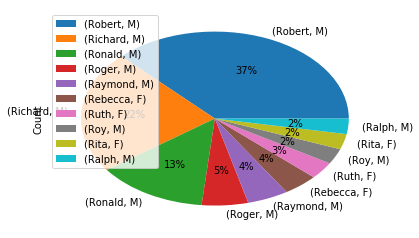

In [21]:
plot_data.plot.pie(y = 'Count', autopct='%i%%')

In [22]:
def calc_sum_cl(x):
    consonant_letters = "BCDFGHJKLMNPQRSTVWXYZbcdfghjklmnpqrstvwxyz"
    sum_cl = sum(1 for t in x if t in consonant_letters)
    return sum_cl


data_pathes = []
data_years = []
data_for_analytics = []


for year in range(years_begin, years_end):
    str_year = "yob" + str(year)+ ".txt"
    path_test = os.path.join(DATA_PATH, str_year)
    if os.path.exists(path_test) and os.path.isfile(path_test):
        data_pathes.append(path_test)
        data_years.append(year)

for dp in data_pathes:
    data_for_analytics.append(pnd.read_csv(dp, names = ['Name', 'Gender', 'Count']))

if len(data_for_analytics):
    data_by_all_years_without_years = pnd.concat(data_for_analytics).drop('Gender', axis=1)
    #data_by_all_years_without_years['num_cons_lett'] = data_by_all_years_without_years['Name'].map(calc_sum_cl)
    group_data_without_years = data_by_all_years_without_years.groupby('Name').sum()



In [23]:
group_data_without_years = group_data_without_years.reset_index()

In [24]:
group_data_without_years['num_cons_lett'] = group_data_without_years['Name'].map(calc_sum_cl)

In [25]:
group_data_without_years.head(15)

,Name,Count,num_cons_lett
0,Aadam,52,2
1,Aadil,71,2
2,Aaditya,19,3
3,Aage,7,1
4,Aagot,5,2
5,Aailiyah,5,3
6,Aailyah,27,3
7,Aaisha,77,2
8,Aajah,6,2
9,Aakash,370,3


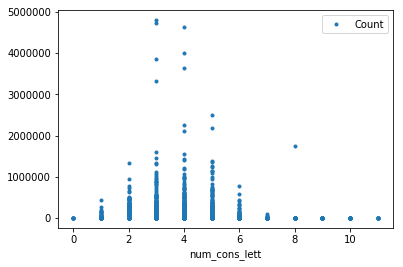

In [26]:
group_data_without_years.plot(x='num_cons_lett', y='Count', style='o', markersize=3);